# Evaluation pipeline

## 0 Imports and Constants

In [34]:
import sys
import os

# Füge das übergeordnete Verzeichnis zu sys.path hinzu
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, parent_dir)

In [35]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy as dc
from sklearn.decomposition import PCA
import itertools
from tqdm import tqdm
import json
from datetime import datetime

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from data_augmentation_methods.algorithmic.brownian_motion import brownian_motion

from utils.utils import load_time_series, plot_multiple_time_series_attributes

from baseline_model.LSTM import LSTM, train_model

In [36]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [37]:
DATA_FOLDER = Path("../data")
REAL_DATA_FOLDER = DATA_FOLDER / "real"
SYNTHETIC_DATA_FOLDER = DATA_FOLDER / "synthetic"
BENCHMARK = False

## 1 Load Baseline Model and Data

In [38]:
data_real = load_time_series(REAL_DATA_FOLDER/'AAPL_22_23_real.csv')
data_syn = load_time_series(SYNTHETIC_DATA_FOLDER/'AAPL_22_23_syn.csv')

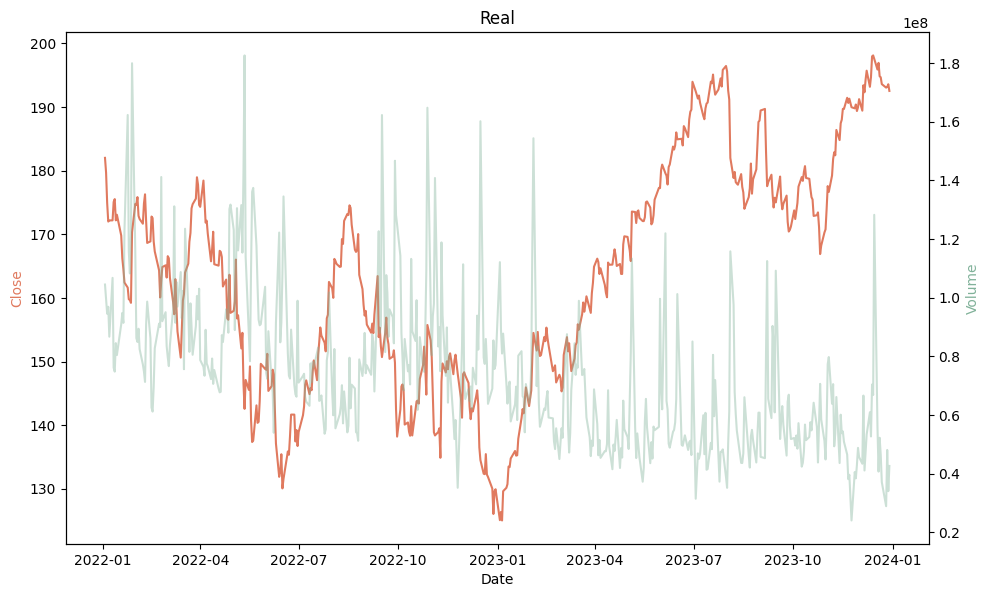

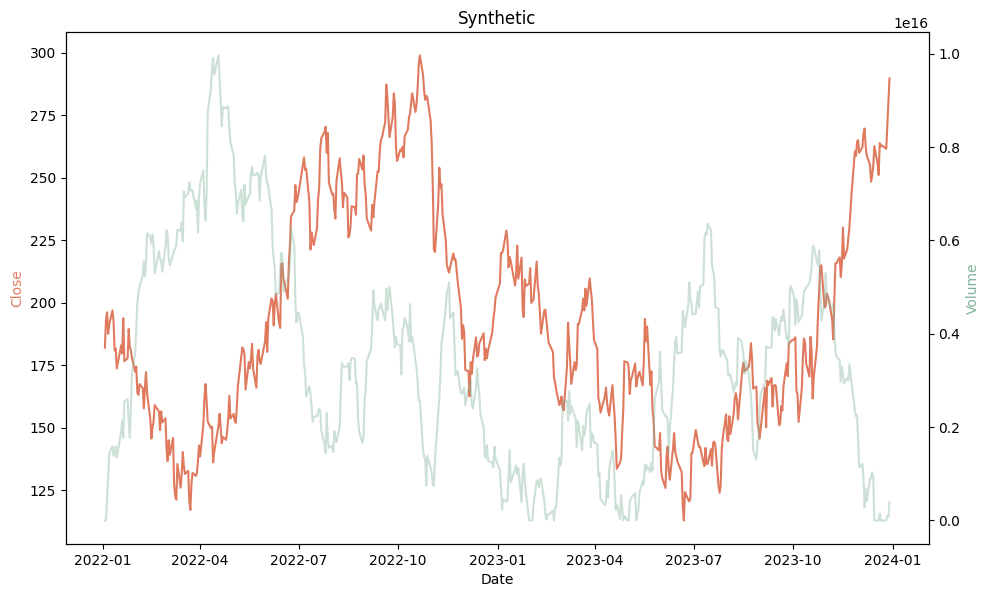

In [39]:
plot_multiple_time_series_attributes(data_real, title="Real")
plot_multiple_time_series_attributes(data_syn, title="Synthetic")

## 2 Train and Test Baseline Model

### 2.1 Train on Real, Test on Synthetic

### 2.2 Train on Synthetic, Test on Real

## 3 Visualize Synthetic vs Real Data

In [40]:
# convert data into numpy arrays
data_real = data_real[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].to_numpy()
data_syn = data_syn[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].to_numpy()

In [41]:
data_real[:10]

array([[1.77830002e+02, 1.82880005e+02, 1.77710007e+02, 1.82009995e+02,
        1.79481094e+02, 1.04487900e+08],
       [1.82630005e+02, 1.82940002e+02, 1.79119995e+02, 1.79699997e+02,
        1.77203201e+02, 9.93104000e+07],
       [1.79610001e+02, 1.80169998e+02, 1.74639999e+02, 1.74919998e+02,
        1.72489639e+02, 9.45376000e+07],
       [1.72699997e+02, 1.75300003e+02, 1.71639999e+02, 1.72000000e+02,
        1.69610199e+02, 9.69040000e+07],
       [1.72889999e+02, 1.74139999e+02, 1.71029999e+02, 1.72169998e+02,
        1.69777832e+02, 8.67091000e+07],
       [1.69080002e+02, 1.72500000e+02, 1.68169998e+02, 1.72190002e+02,
        1.69797577e+02, 1.06765600e+08],
       [1.72320007e+02, 1.75179993e+02, 1.70820007e+02, 1.75080002e+02,
        1.72647385e+02, 7.61383000e+07],
       [1.76119995e+02, 1.77179993e+02, 1.74820007e+02, 1.75529999e+02,
        1.73091141e+02, 7.48052000e+07],
       [1.75779999e+02, 1.76619995e+02, 1.71789993e+02, 1.72190002e+02,
        1.69797577e+02, 

In [42]:
no_samples = min([1000, len(data_real)]) # number of samples
sampling_indices = np.random.permutation(len(data_real))[:no_samples] # get random indices for random samples from original data (only as much as no_samples)

# get only random samples 
data_real = data_real[sampling_indices]
data_syn = data_syn[sampling_indices]

no, seq_len, dim = data_real.shape

ValueError: not enough values to unpack (expected 3, got 2)

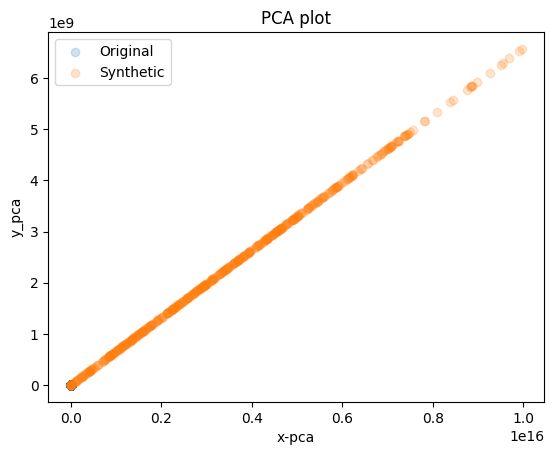

In [ ]:
# PCA Analysis
pca = PCA(n_components = 2)
pca.fit(data_real)
pca_real_results = pca.transform(data_real)
pca_syn_results = pca.transform(data_syn)

# Plotting
f, ax = plt.subplots(1)    
plt.scatter(pca_real_results[:,0], pca_real_results[:,1], alpha = 0.2, label = "Original")
plt.scatter(pca_syn_results[:,0], pca_syn_results[:,1], alpha = 0.2, label = "Synthetic")

ax.legend()  
plt.title('PCA plot')
plt.xlabel('x-pca')
plt.ylabel('y_pca')
plt.show()

In [ ]:
pca.explained_variance_ratio_ # 1st component explains 88.9% of the variance

array([1.0000000e+00, 2.0023484e-12])

In [ ]:
synthetic_data_scaled_pca[:10]

NameError: name 'synthetic_data_scaled_pca' is not defined

## 4 Save Evaluation Data